<a href="https://colab.research.google.com/github/Stilltyde/Pytorch-or-sum/blob/main/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Creating a Model class that inherits nn.Module

class Model(nn.Module):
  #Input Layer (with 4 features)
  #--> Hidden Layer1 (Some number of neurons)
  #--> Hidden Layer2
  #--> Output

  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() #Instantiating a Model (ig)
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [3]:
#Pick a manual seed for randomization
torch.manual_seed(41)

#Create an instance of model
model = Model()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
#Change words to nums in last column

my_df['species'] = my_df['species'].replace('setosa', 0).replace('virginica',1).replace('versicolor',2)


/tmp/ipython-input-6-2429508835.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('setosa', 0).replace('virginica',1).replace('versicolor',2)


In [7]:
#Train test split. Set X, Y
X = my_df.drop('species', axis=1)
y = my_df['species']

y


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,1
147,1
148,1


In [8]:
#Converting X and y into numpy arrays
X = X.values
y = y.values


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)


In [11]:
#Converting arrays into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [12]:
#Converting y data to the other Long tensors
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

In [13]:
#Set the critertia of model to measure the error
criterian = nn.CrossEntropyLoss()

#Choose Adam optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [14]:

epochs = 100
losses = []
for i in range(epochs):
  #Go forward and make a prediction
  y_pred = model.forward(X_train) # Get predicted results

  #Measure loss

  loss = criterian(y_pred, y_train) #predicted value against actual value
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch {i} and loss is {loss}')

  #Back propagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss is 1.1537374258041382
Epoch 10 and loss is 1.0141024589538574
Epoch 20 and loss is 0.7912291288375854
Epoch 30 and loss is 0.5638419985771179
Epoch 40 and loss is 0.4369649887084961
Epoch 50 and loss is 0.3270537555217743
Epoch 60 and loss is 0.2143581211566925
Epoch 70 and loss is 0.12762346863746643
Epoch 80 and loss is 0.08098240941762924
Epoch 90 and loss is 0.05858753249049187


Text(0.5, 0, 'Epochs')

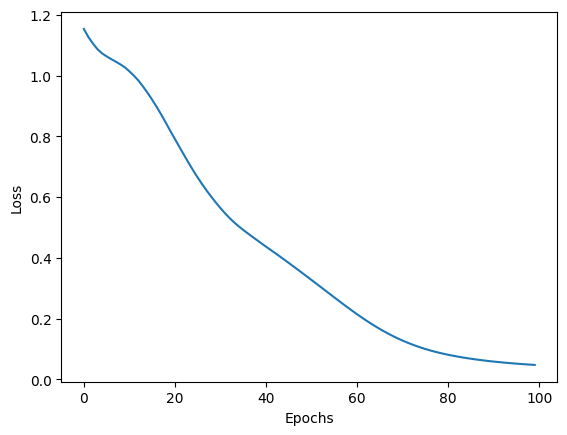

In [15]:
#Graphing out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [16]:
#Evaluating model on test dataset

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterian(y_eval, y_test)

In [17]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    #Thiss will tell us what type is iris our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t  {y_test[i]}')

    #Correct or not

    if y_val.argmax().item() == y_test[i]:
      print("Correct")
      correct += 1
    else:
      print("Wrong")



1.) tensor([-8.2987,  4.9471,  2.0440]) 	  1
Correct
2.) tensor([-11.1297,   8.0329,   1.5449]) 	  1
Correct
3.) tensor([-11.7527,   7.9544,   2.0461]) 	  1
Correct
4.) tensor([-4.1139, -0.2781,  3.2722]) 	  2
Correct
5.) tensor([-9.6343,  5.9595,  2.1455]) 	  1
Correct
6.) tensor([-1.9076, -2.8279,  3.5518]) 	  2
Correct
7.) tensor([-7.2973,  3.5012,  2.4671]) 	  1
Correct
8.) tensor([-3.5690, -0.9219,  3.3847]) 	  2
Correct
9.) tensor([-8.3601,  4.6120,  2.3233]) 	  1
Correct
10.) tensor([-11.6700,   8.3763,   1.6467]) 	  1
Correct
11.) tensor([-6.8764,  3.0658,  2.5214]) 	  1
Correct
12.) tensor([ 10.0038, -16.2728,   4.4447]) 	  0
Correct
13.) tensor([  9.0948, -14.7599,   4.0449]) 	  0
Correct
14.) tensor([-0.6536, -3.5495,  3.1433]) 	  2
Correct
15.) tensor([  8.4797, -14.3939,   4.1975]) 	  0
Correct
16.) tensor([-6.9041,  2.9812,  2.6404]) 	  1
Correct
17.) tensor([  8.9711, -14.7701,   4.1161]) 	  0
Correct
18.) tensor([-7.9227,  4.4141,  2.2038]) 	  2
Wrong
19.) tensor([  9.5

In [18]:
print(f'We have {correct} correcct answers')

We have 29 correcct answers


In [28]:
new_iris = torch.tensor([2.7, 1.2, 2.3, 0.2])
values = ['Setosa', 'Virginica', 'Vigricolor']

In [29]:
with torch.no_grad():
  print(values[model(new_iris).argmax().item()])

Vigricolor


In [30]:
#Save the model
torch.save(model.state_dict(), 'My_iris_model.pt')

In [33]:
#Loading the model
new_model = Model()
new_model.load_state_dict(torch.load('My_iris_model.pt'))

<All keys matched successfully>

In [34]:
#Checking the model has loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)